In [1]:
from rimport import rimport
from astropy.io import fits as pyfits
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
flexiPlot = rimport('https://dubshen.astro.su.se/~flca3632/synthetic/plotpol.py','flexiPlot')

In [3]:
cc = 2.99792458e10 # Speed of light [cm/s] as defined in MULTI3D

In [4]:
# Stokes I
hdulist = pyfits.open('https://dubshen.astro.su.se/~flca3632/synthetic/mu100-intensity/ie.ca2_8542A_mu1.00.muram_plage_580000.1024x1024x673.fits')
data_ie = hdulist['DATA'].data

# Wavelengths in A, vacuum wavelengths (!)
w = cc/hdulist['wavelength axis'].data*1.e8

# Spatial extension
extXs = hdulist['DATA'].header['CRVAL1']
extXe = extXs + hdulist['DATA'].header['CDELT1']*(hdulist['DATA'].header['NAXIS1']-1)
extYs = hdulist['DATA'].header['CRVAL2']
extYe = extYs + hdulist['DATA'].header['CDELT2']*(hdulist['DATA'].header['NAXIS2']-1)

hdulist.close()

<IPython.core.display.Javascript object>


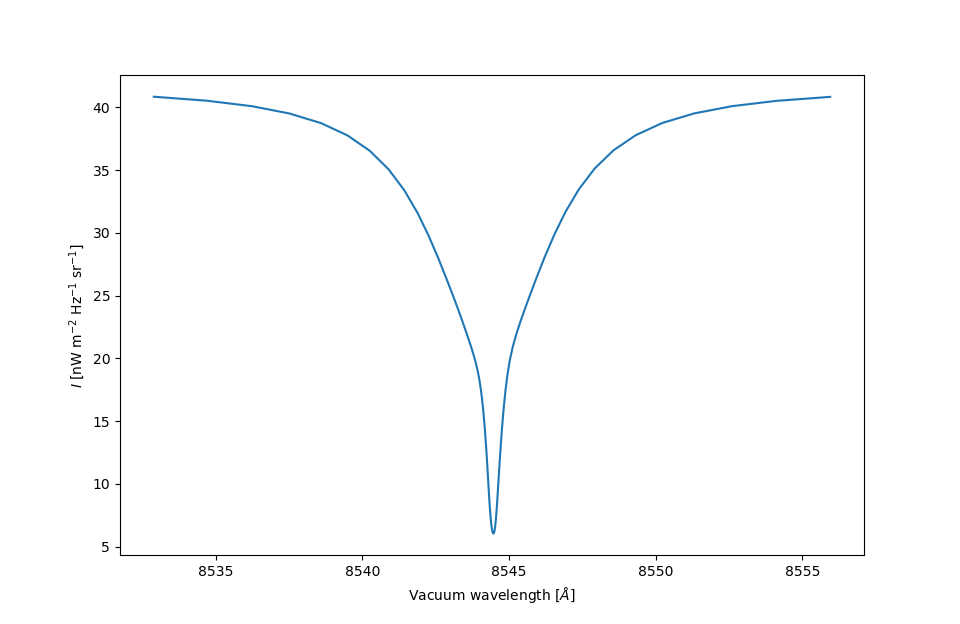

In [5]:
xlabels = ('Vacuum wavelength [$\\AA$]',)
ylabels = ('$I$ [nW m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]',)

iunit  = 1.e-7*1.e9*1.e4

fig,ax = flexiPlot(np.mean(data_ie*iunit,axis=(1,2)),freqs=w,xlabels=xlabels,ylabels=ylabels)

<IPython.core.display.Javascript object>


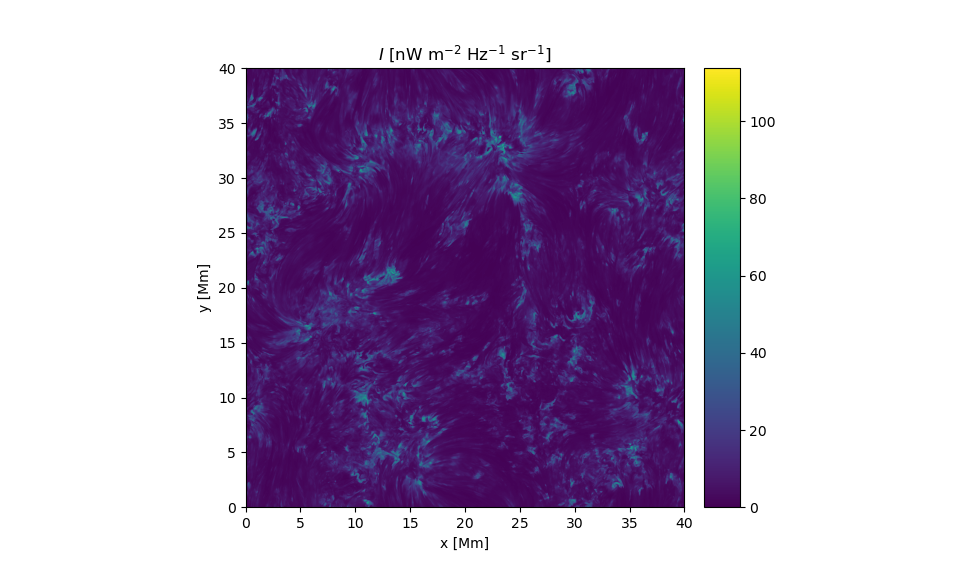

In [6]:
ff      = 50
aspect  = 1.

iunit   = 1.e-7*1.e9*1.e4

ithr    = np.max(data_ie[ff,:,:]*iunit)

vmins   = (0.,)
vmaxs   = (ithr,)
extent  = [extXs,extXe,extYs,extYe]

titles  = ('$I$ [nW m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]',)
colors  = (plt.cm.viridis,)

xlabels = ('x [Mm]',)
ylabels = ('y [Mm]',)

fig,ax  = flexiPlot((data_ie[ff,:,:]*iunit,),extent=extent,vmins=vmins,vmaxs=vmaxs,colors=colors,titles=titles,xlabels=xlabels,ylabels=ylabels)